### 인증키 받아오기

In [1]:
from dotenv import load_dotenv

load_dotenv()

True

### langsmith 설정

In [3]:
from langchain_teddynote import logging

logging.langsmith("01-Basic")

LangSmith 추적을 시작합니다.
[프로젝트명]
01-Basic


### openai의 사용

In [ ]:
my_model = "gpt-4.1-nano"

대화의 객체들
1. AIMessage : AI모델의 응답
2. HumanMessage : 사용자의 입력/질문
3. SystemMessage : 페르소나 설정, AI의 역할을 설정
4. FunctionMessage/ToolMessage : 특정함수나 도구를 호출한 결과
 

In [7]:
from langchain_openai import ChatOpenAI

# temperature, model_name
llm = ChatOpenAI(
    temperature=0.1,
    model_name=my_model,
)

question = "What is the capital of South Korea?"

llm.invoke(question)

AIMessage(content='The capital of South Korea is Seoul.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 8, 'prompt_tokens': 15, 'total_tokens': 23, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_c4c155951e', 'id': 'chatcmpl-C5i2vKjpHGYIVcKNh2NG3bKqZqhh1', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--64a69df2-cb9c-4f6d-9bc9-a78822d9edcc-0', usage_metadata={'input_tokens': 15, 'output_tokens': 8, 'total_tokens': 23, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

### Gemini의 사용

In [9]:
from langchain_google_genai import ChatGoogleGenerativeAI

# temperature, model_name
llm = ChatGoogleGenerativeAI(
    temperature=0.1,
    model="gemini-2.5-flash",
)

question = "What is the capital of South Korea?"

llm.invoke(question)

AIMessage(content='The capital of South Korea is **Seoul**.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': []}, id='run--8198f139-3957-4643-b6dd-689bec14932b-0', usage_metadata={'input_tokens': 9, 'output_tokens': 28, 'total_tokens': 37, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 19}})

In [14]:
question = "대한민국의 가장 아름다운 관광지 5곳을 추천해주세요."
answer = llm.stream(question)

In [ ]:
for token in answer:
    print(token.content, end="", flush=True)

대한민국에는 아름다운 곳이 너무 많아 5곳을 선정하기가 정말 어렵습니다. 하지만 많은 사람들이 공감하고, 자연과 역사가 어우러진 대표적인 명소들을 기준으로 5곳을 추천해 드립니다.

---

**대한민국에서 가장 아름다운 관광지 5곳 추천:**

1.  **제주도 (Jeju Island)**
    *   **아름다움의 이유:** 한국의 보물섬이라 불리는 제주도는 한라산, 성산일출봉, 주상절리, 용암동굴 등 독특한 화산 지형과 에메랄드빛 바다, 오름, 숲길이 어우러져 어디를 가도 그림 같은 풍경을 자랑합니다. 유네스코 세계자연유산으로 등재되어 그 가치를 인정받았습니다.
    *   **추천 포인트:** 올레길 트레킹, 오름 등반, 해변 드라이브, 동굴 탐험.

2.  **경주 (Gyeongju)**
    *   **아름다움의 이유:** 신라 천년의 역사가 살아 숨 쉬는 '지붕 없는 박물관' 경주는 불국사, 석굴암(유네스코 세계유산), 대릉원, 동궁과 월지(안압지) 등 고즈넉한 유적들이 자연과 조화를 이루며 독특한 아름다움을 선사합니다. 특히 벚꽃 시즌에는 도시 전체가 분홍빛으로 물들어 환상적인 풍경을 연출합니다.
    *   **추천 포인트:** 역사 유적지 탐방, 야경 감상(동궁과 월지), 한옥 숙박 체험.

3.  **설악산 국립공원 (Seoraksan National Park)**
    *   **아름다움의 이유:** 한국의 알프스라 불리는 설악산은 웅장한 기암괴석, 울창한 숲, 맑은 계곡과 폭포가 어우러져 사계절 내내 아름다운 풍경을 자랑합니다. 특히 가을 단풍과 겨울 설경은 그야말로 절경으로, 많은 등산객과 관광객의 발길을 이끕니다.
    *   **추천 포인트:** 케이블카를 이용한 권금성 조망, 비선대, 울산바위 등반, 천불동 계곡 트레킹.

4.  **안동 하회마을 (Andong Hahoe Folk Village)**
    *   **아름다움의 이유:** 낙동강이 S자 모양으로 휘감아 흐르는 배산임수 지형에 자리 잡은 하회마을은 조선 

In [ ]:
#!pip install langchain-teddynote
from langchain_teddynote.messages import stream_response

answer = llm.stream(question)
stream_response(answer)

대한민국에는 정말 아름다운 곳이 많지만, 그중에서도 특히 "가장 아름다운"이라는 수식어가 잘 어울리는 5곳을 추천해 드립니다. 자연경관, 역사적 가치, 독특한 분위기 등을 종합적으로 고려했습니다.

1.  **제주도 (Jeju Island)**
    *   **추천 이유:** 유네스코 세계자연유산으로 등재된 화산섬으로, 한라산, 성산일출봉, 주상절리, 폭포, 에메랄드빛 해변 등 다채로운 자연경관을 자랑합니다. 사계절 내내 다른 매력을 뽐내며, 어디를 가든 그림 같은 풍경을 만날 수 있습니다.
    *   **주요 볼거리:** 한라산, 성산일출봉, 섭지코지, 우도, 협재해변, 천지연폭포, 정방폭포 등

2.  **설악산 국립공원 (Seoraksan National Park)**
    *   **추천 이유:** 한국의 대표적인 명산으로, 웅장한 기암괴석과 울창한 숲이 어우러져 사계절 내내 절경을 이룹니다. 특히 가을 단풍은 전국 최고로 꼽히며, 겨울 설경 또한 매우 아름답습니다.
    *   **주요 볼거리:** 권금성, 비룡폭포, 울산바위, 흔들바위, 신흥사, 백담사 등

3.  **경주 (Gyeongju)**
    *   **추천 이유:** 신라 천년의 역사가 살아 숨 쉬는 도시 전체가 박물관이라고 불릴 만큼 아름다운 역사 유적과 자연이 조화를 이룹니다. 특히 봄에는 벚꽃이 만개하여 더욱 아름다운 풍경을 선사합니다.
    *   **주요 볼거리:** 불국사, 석굴암, 대릉원(천마총), 동궁과 월지(안압지), 첨성대, 황리단길 등

4.  **보성 녹차밭 (Boseong Green Tea Fields)**
    *   **추천 이유:** 끝없이 펼쳐진 푸른 녹차밭이 계단식으로 조성되어 있어 이국적이면서도 평화로운 풍경을 자랑합니다. 사진 찍기 좋은 명소로도 유명하며, 녹차밭 사이를 걷는 것만으로도 힐링이 됩니다.
    *   **주요 볼거리:** 대한다원, 율포해변(인근), 제암산 자연휴양림 등

5.  **순천만국가정원 & 순천만습지 (Sunch

### openai callback

### multi-modal

In [ ]:
from langchain_teddynote.models import MultiModal
from langchain_teddynote.messages import stream_response

llm = ChatOpenAI(
    temperature=0.1,
    model_name="gpt-4.1-nano",
)

user_prompt = "이 사진에 대해 설명해주세요."
system_prompt = (
    "당신은 사진에 대한 설명을 잘하는 AI입니다. 사진에 대한 설명을 해주세요."
)
# MultiModal 클래스의 객체 생성
MultiModal_llm = MultiModal(llm, user_prompt=user_prompt, system_prompt=system_prompt)


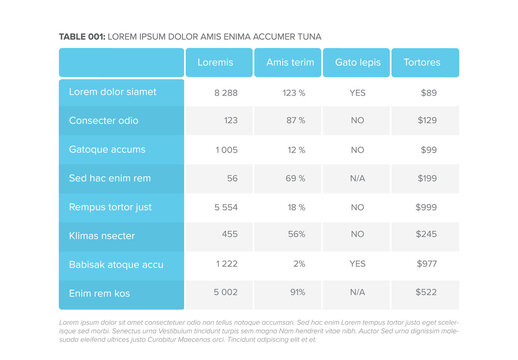

이 사진은 표 형식으로 된 데이터를 보여줍니다. 표는 여러 행과 열로 구성되어 있으며, 각 열은 제목이 있습니다. 제목은 "Lorem ipsum", "Amis termin", "Gato lepis", "Totores"입니다. 표의 내용은 다양한 숫자와 퍼센트, 그리고 "YES", "NO", "N/A" 등의 값으로 채워져 있습니다. 표 아래에는 작은 글씨로 설명이 적혀 있는데, 이는 더미 텍스트로 보입니다. 전체적으로 이 표는 어떤 데이터를 정리해서 보여주는 형식입니다.

In [24]:
IMAGE_URL = "https://t3.ftcdn.net/jpg/03/77/33/96/360_F_377339633_Rtv9I77sSmSNcev8bEcnVxTHrXB4nRJ5.jpg"
answer = MultiModal_llm.stream(IMAGE_URL)
stream_response(answer)

In [ ]:
from langchain_core.prompts import ChatPromptTemplate, PromptTemplate

template = "{country}의 수도는 어디인가요?"

prompt_template = PromptTemplate.from_template(template)
# print("{}".format("대한민국")
prompt = prompt_template.format(country="대한민국")
print(prompt)
print(type(prompt))
prompt = prompt_template.invoke("대한민국")
print(prompt)
print(type(prompt))

대한민국의 수도는 어디인가요?
<class 'str'>
text='대한민국의 수도는 어디인가요?'
<class 'langchain_core.prompt_values.StringPromptValue'>


In [ ]:
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser

template = "{country}의 수도는 어디인가요?"
prompt = PromptTemplate.from_template(template)
#
print(type(prompt))
llm = ChatGoogleGenerativeAI(temperature=0.1, model="gemini-2.5-flash")
output_parser = StrOutputParser()
# chain : prompt -> llm # -> output_parser
chain = prompt | llm | output_parser

chain.invoke("대한민국")

<class 'langchain_core.prompts.prompt.PromptTemplate'>


'대한민국의 수도는 **서울**입니다.'

In [ ]:
from langchain_core.runnables import RunnablePassthrough

prompt = "{country}의 여행 할만한 여행지를 1곳만 추천해줘."
prompt_template = PromptTemplate.from_template(prompt)
parser = StrOutputParser()
chain = {"country": RunnablePassthrough()} | prompt_template | llm | parser

print(chain.invoke("대한민국"))

대한민국에서 여행하기 좋은 곳 3곳을 추천해 드릴게요! 각기 다른 매력을 가진 곳들입니다.

1.  **서울 (Seoul)**
    *   **추천 이유:** 대한민국의 수도이자 가장 활기찬 도시로, 전통과 현대가 공존하는 매력을 느낄 수 있습니다. 처음 한국을 방문하는 분들에게는 필수 코스입니다.
    *   **주요 볼거리:**
        *   **역사/문화:** 경복궁, 창덕궁, 북촌 한옥마을, 인사동
        *   **현대/쇼핑:** 명동, 홍대, 강남 (가로수길, 코엑스), 동대문디자인플라자(DDP)
        *   **야경/랜드마크:** 남산타워, 롯데월드타워
    *   **특징:** 미식, 쇼핑, K-POP, 역사, 문화 등 모든 것을 한 번에 경험할 수 있습니다.

2.  **제주도 (Jeju Island)**
    *   **추천 이유:** 아름다운 자연경관으로 유명한 한국의 대표적인 휴양지입니다. 유네스코 세계자연유산으로 지정된 곳들이 많아 자연의 웅장함을 느낄 수 있습니다.
    *   **주요 볼거리:**
        *   **자연:** 한라산, 성산일출봉, 섭지코지, 주상절리대, 오름(새별오름, 용눈이오름 등)
        *   **해변:** 협재 해변, 함덕 해변, 월정리 해변
        *   **문화/체험:** 돌하르방, 동백꽃 군락지(겨울), 감귤 체험
    *   **특징:** 에메랄드빛 바다, 독특한 화산 지형, 신선한 해산물 등 힐링과 자연을 만끽하기에 좋습니다.

3.  **부산 (Busan)**
    *   **추천 이유:** 활기찬 항구 도시이자 해양 도시로, 서울과는 또 다른 매력을 가진 곳입니다. 바다와 도시의 조화가 아름답고, 신선한 해산물을 맛볼 수 있습니다.
    *   **주요 볼거리:**
        *   **해변:** 해운대 해변, 광안리 해변 (광안대교 야경)
        *   **문화/예술:** 감천문화마을, 영화의 전당
        *   **시장